In [28]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import io
from time import time

In [29]:
zomato_data = pd.read_csv(r'../data/Zomato/zomato.csv',encoding='latin-1')
print (zomato_data.head())
zomato_data.dtypes

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [36]:
zomato_data = zomato_data[~(zomato_data['Votes'] <= 20)] 
zomato_data = zomato_data.drop('Rating text', axis = 1)
zomato_data = zomato_data.drop('Rating color', axis = 1)
zomato_data = pd.get_dummies(zomato_data)
# Display the first 5 rows of the last 12 columns
print (zomato_data.iloc[:,5:].head(5))
zomato_data.columns

   Price range  Aggregate rating  Votes  Restaurant Name_#45  \
0            3               4.8    314                    0   
1            3               4.5    591                    0   
2            4               4.4    270                    0   
3            4               4.9    365                    0   
4            4               4.8    229                    0   

   Restaurant Name_#Dilliwaala6  Restaurant Name_#OFF Campus  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Restaurant Name_#Urban Cafí©  Restaurant Name_'Ohana  \
0                             0                       0   
1                             0                       0   
2                             0                      

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'Restaurant Name_#45', 'Restaurant Name_#Dilliwaala6',
       ...
       'Currency_Rand(R)', 'Currency_Sri Lankan Rupee(LKR)',
       'Currency_Turkish Lira(TL)', 'Has Table booking_No',
       'Has Table booking_Yes', 'Has Online delivery_No',
       'Has Online delivery_Yes', 'Is delivering now_No',
       'Is delivering now_Yes', 'Switch to order menu_No'],
      dtype='object', length=13189)

In [0]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(zomato_data['Aggregate rating'])
# Remove the labels from the features
# axis 1 refers to the columns
zomato_data = zomato_data.drop('Aggregate rating', axis = 1)
# Saving feature names for later use
zomatodata_list = list(zomato_data.columns)
# Convert to numpy array
zomato_data_array = np.array(zomato_data)

In [0]:
train_features, test_features, train_labels, test_labels = train_test_split(zomato_data_array, labels, test_size = 0.20, random_state = 0)

In [39]:
print(len(train_features), "train +", len(test_features), "test")

4334 train + 1084 test


In [40]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4334, 13188)
Training Labels Shape: (4334,)
Testing Features Shape: (1084, 13188)
Testing Labels Shape: (1084,)


In [41]:
time_Start = time()
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False).fit(train_features,train_labels)
time_Taken = time() - time_Start
print ("Time Taken without pruning",time_Taken)

Time Taken without pruning 834.8332779407501


In [42]:
pred = gbm.predict(test_features)
errors = abs(pred - test_labels)
print('Mean Absolute Error on test data:', round(np.mean(errors), 2))
mape = 100 * (errors / test_labels)
#print('MAPE', mape)
accuracy = 100 - np.mean(mape)
#print('Prediction', predictions)
print('Accuracy of test data:', round(accuracy, 2), '%.')

from sklearn.metrics import r2_score
test_acc = r2_score(test_labels,pred)

pred_train = gbm.predict(train_features)
errors = abs(pred_train - train_labels)
print('Mean Absolute Error on train data:', round(np.mean(errors), 2))
mape = 100 * (errors / train_labels)
#print('MAPE', mape)
accuracy = 100 - np.mean(mape)
#print('Prediction', predictions)
print('Accuracy of train data:', round(accuracy, 2), '%.')
train_acc = r2_score(train_labels,pred_train)

print ("R2 score of train data" , train_acc)
print ("R2 score of test data", test_acc)

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(train_labels, pred_train))
print("RMSE of train data" , rms) 
rmse = sqrt(mean_squared_error(test_labels, pred))
print("RMSE of test data" , rmse) 

Mean Absolute Error on test data: 0.26
Accuracy of test data: 92.15 %.
Mean Absolute Error on train data: 0.19
Accuracy of train data: 94.43 %.
R2 score of train data 0.823251162837494
R2 score of test data 0.6220562173580816
RMSE of train data 0.23193597111121647
RMSE of test data 0.3452142482465344


       importance                                           variable
11527    0.000000  Locality Verbose_Two Horizon Center, Golf Cour...
2468     0.000000           Restaurant Name_Najmat Lahore Restaurant
2466     0.000000                           Restaurant Name_Naivedya
2464     0.000000                    Restaurant Name_Nagpal Di Hatti
2463     0.000000                 Restaurant Name_Nagaland's Kitchen
2462     0.000000                           Restaurant Name_Nagaland
2461     0.000000                              Restaurant Name_Nagai
2460     0.000000                  Restaurant Name_Nafees Restaurant
2459     0.000000               Restaurant Name_Nacho Mamas Burritos
2476     0.000000                       Restaurant Name_Nariyal Cafe
2478     0.000000                          Restaurant Name_Natalia's
2418     0.000000                    Restaurant Name_Mughal Chic Inn
2479     0.000000                Restaurant Name_Nathu's Pastry Shop
4157     0.000000          Restaur

Text(0.5,0,'Variable')

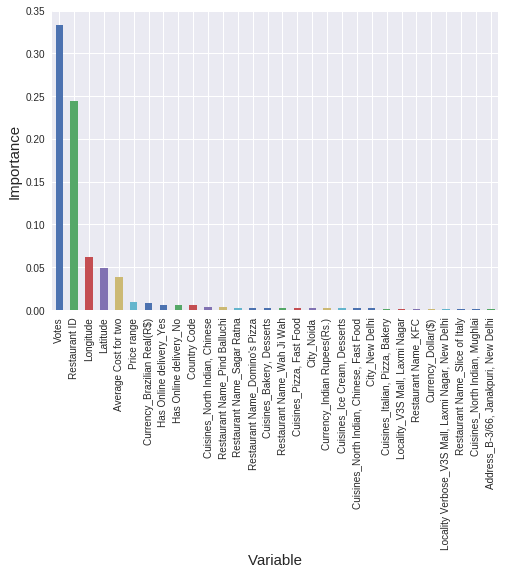

In [44]:
imp = pd.DataFrame(gbm.feature_importances_)
imp['colname'] = zomatodata_list
imp.columns = ['importance','variable']
imp = imp.sort_values(by = ['importance'], ascending = False)
print (imp.sort_values(by = ['importance']))
imp_plot = imp.iloc[:30,:]
print (imp.sort_values(by = ['importance']))
plt.figure()
# imp[:30].plot(kind='barh',fontsize=10)
imp.importance = imp.importance.astype(float)
imp_plot.plot(x="variable", y="importance", kind="bar", fontsize=10, legend=None)
plt.ylabel("Importance", fontsize=15)
plt.xlabel("Variable", fontsize=15)

In [45]:
# print (imp['importance'][0])
# print (imp['variable'][0])
# print (imp)
zomato_data_copy = zomato_data
for i in range (0,len(imp)):
    if imp['importance'][i] < 0.0015:
        zomato_data_copy = zomato_data_copy.drop(str(imp['variable'][i]), axis = 1)
zomatodata_list = list(zomato_data_copy.columns)
# Convert to numpy array
zomato_data_array = np.array(zomato_data_copy)
print (len(zomatodata_list))
print (zomatodata_list)

24
['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes', "Restaurant Name_Domino's Pizza", 'Restaurant Name_Pind Balluchi', 'Restaurant Name_Sagar Ratna', 'Restaurant Name_Wah Ji Wah', 'City_New Delhi', 'City_Noida', 'Locality_V3S Mall, Laxmi Nagar', 'Cuisines_Bakery, Desserts', 'Cuisines_Ice Cream, Desserts', 'Cuisines_Italian, Pizza, Bakery', 'Cuisines_North Indian, Chinese', 'Cuisines_North Indian, Chinese, Fast Food', 'Cuisines_Pizza, Fast Food', 'Currency_Brazilian Real(R$)', 'Currency_Indian Rupees(Rs.)', 'Has Online delivery_No', 'Has Online delivery_Yes']


In [0]:
train_features, test_features, train_labels, test_labels = train_test_split(zomato_data_array, labels, test_size = 0.20, random_state = 0)

In [47]:
print(len(train_features), "train +", len(test_features), "test")

4334 train + 1084 test


In [48]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4334, 24)
Training Labels Shape: (4334,)
Testing Features Shape: (1084, 24)
Testing Labels Shape: (1084,)


In [50]:
time_Start = time()
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False).fit(train_features,train_labels)
time_Taken = time() - time_Start
print ("Time Taken after pruning",time_Taken)

Time Taken after pruning 4.3661980628967285


In [51]:
pred = gbm.predict(test_features)
errors = abs(pred - test_labels)
print('Mean Absolute Error on test data:', round(np.mean(errors), 2))
mape = 100 * (errors / test_labels)
#print('MAPE', mape)
accuracy = 100 - np.mean(mape)
#print('Prediction', predictions)
print('Accuracy of test data:', round(accuracy, 2), '%.')

from sklearn.metrics import r2_score
test_acc = r2_score(test_labels,pred)

pred_train = gbm.predict(train_features)
errors = abs(pred_train - train_labels)
print('Mean Absolute Error on train data:', round(np.mean(errors), 2))
mape = 100 * (errors / train_labels)
#print('MAPE', mape)
accuracy = 100 - np.mean(mape)
#print('Prediction', predictions)
print('Accuracy of train data:', round(accuracy, 2), '%.')
train_acc = r2_score(train_labels,pred_train)

print ("R2 score of train data" , train_acc)
print ("R2 score of test data", test_acc)

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(train_labels, pred_train))
print("RMSE of train data" , rms) 
rmse = sqrt(mean_squared_error(test_labels, pred))
print("RMSE of test data" , rmse) 

Mean Absolute Error on test data: 0.27
Accuracy of test data: 91.85 %.
Mean Absolute Error on train data: 0.08
Accuracy of train data: 97.79 %.
R2 score of train data 0.9710161341949104
R2 score of test data 0.6000316870702354
RMSE of train data 0.09392214044563874
RMSE of test data 0.35513044267791144


    importance                                   variable
21    0.000704                Currency_Indian Rupees(Rs.)
7     0.002068             Restaurant Name_Domino's Pizza
15    0.002150               Cuisines_Ice Cream, Desserts
11    0.002551                             City_New Delhi
14    0.002958                  Cuisines_Bakery, Desserts
19    0.003000                  Cuisines_Pizza, Fast Food
10    0.003118                 Restaurant Name_Wah Ji Wah
12    0.003221                                 City_Noida
9     0.003223                Restaurant Name_Sagar Ratna
13    0.003703             Locality_V3S Mall, Laxmi Nagar
16    0.003783            Cuisines_Italian, Pizza, Bakery
18    0.003791  Cuisines_North Indian, Chinese, Fast Food
8     0.004266              Restaurant Name_Pind Balluchi
20    0.005348                Currency_Brazilian Real(R$)
1     0.006271                               Country Code
17    0.006953             Cuisines_North Indian, Chinese
22    0.007472

Text(0.5,0,'Variable')

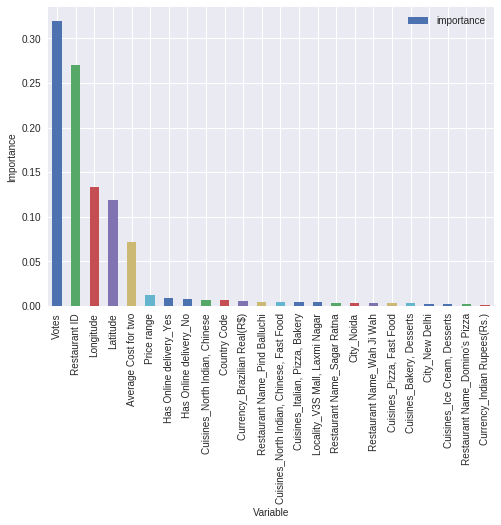

In [52]:
imp = pd.DataFrame(gbm.feature_importances_)
imp['colname'] = zomatodata_list
imp.columns = ['importance','variable']
imp = imp.sort_values(by = ['importance'], ascending = False)
print (imp.sort_values(by = ['importance']))
imp_plot = imp.iloc[:35,:]
print (imp.sort_values(by = ['importance']))
plt.figure(figsize=(80,50))
# imp[:30].plot(kind='barh',fontsize=10)
imp.importance = imp.importance.astype(float)
imp_plot.plot(x="variable", y="importance", kind="bar", fontsize=10 )
plt.ylabel("Importance", fontsize=10)
plt.xlabel("Variable", fontsize=10)